# 1.データの概要を確認する

### 必要なインポートの読み込み

In [5]:
import pandas as pd
import numpy as np

### データの読み込み

In [6]:
csv_dir = "/home/jovyan/work/titanic/"

train_df = pd.read_csv(csv_dir + "train.csv")
test_df = pd.read_csv(csv_dir +"test.csv")
submission = pd.read_csv(csv_dir +"gender_submission.csv")

### データ数の確認

In [7]:
import pandas_profiling as pdp
pdp.ProfileReport(train_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
import ydata_profiling
profile_report = ydata_profiling.ProfileReport(train_df)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import pygwalker as pyg

In [10]:
pyg.walk(train_df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [12]:
import plotly.express as px

In [22]:
fig = px.histogram(train_df, x='Age')
fig.show()

In [20]:
import plotly.graph_objects as go

# インスタンス作成
fig = go.Figure()

fig.add_trace(
  go.Bar(x=train_df['Age'],
         y=train_df['Survived'],
            name='')
)

In [4]:
print("学習データの数:",train_df.shape)
print("テストデータの数:",test_df.shape)
print("submissionデータの数:",submission.shape)

学習データの数: (891, 12)
テストデータの数: (418, 11)
submissionデータの数: (418, 2)


### データの確認

Survived(生存 1 死亡 0),  
Pclass(チケットの階級 1>2>3),  
Sibsp(乗船している兄弟や配偶者の数),  
Parch(乗船している親や子供の数),  
Ticket(チケット番号),
Fare(チケット料金),  
Cabin(部屋番号),  
Embarked(乗船した港)

In [5]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 学習データ、テストデータそれぞれの統計量を確認

In [9]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
test_df.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

### カテゴリ変数の確認

In [11]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### 欠損値の確認

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.データの可視化

### データの可視化に必要なライブラリのインポート

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### 乗船した港ごとの生存率可視化

欠損値除去

In [16]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

Embarked  Survived  PassengerId
0          S         0            1
1          C         1            2
2          S         1            3
3          S         1            4
4          S         0            5
..       ...       ...          ...
886        S         0          887
887        S         1          888
888        S         0          889
889        C         1          890
890        Q         0          891

[889 rows x 3 columns]

EmbarkedとSurvivedの値で集計する

In [17]:
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

横持ちデータに変換してデータフレームに代入

In [18]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

In [19]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot: xlabel='Embarked'>

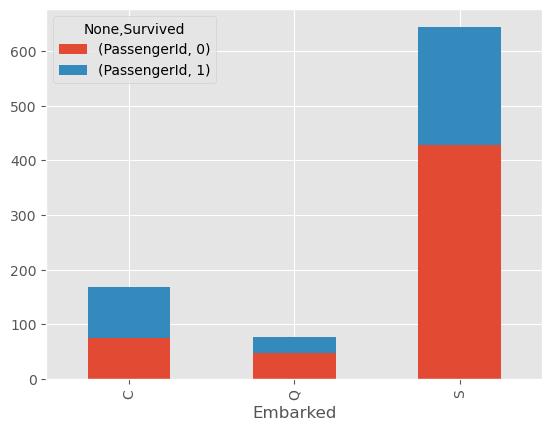

In [20]:
embarked_df.plot.bar(stacked=True)

In [21]:
embarked_df["survived_rate"] = embarked_df.iloc[:,1]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [22]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

### 性別ごとの生存率可視化

In [23]:
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()

In [24]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<AxesSubplot: xlabel='Sex'>

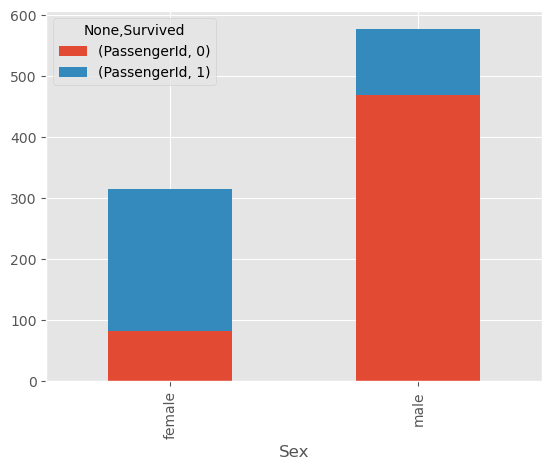

In [25]:
sex_df.plot.bar(stacked=True)

In [26]:
sex_df["survived_rate"] = sex_df.iloc[:,1]/(sex_df.iloc[:,0] + sex_df.iloc[:,1])

In [27]:
sex_df

PassengerId      survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

### チケット階級ごとの生存率可視化

In [28]:
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()

In [29]:
ticket_df

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

<AxesSubplot: xlabel='Pclass'>

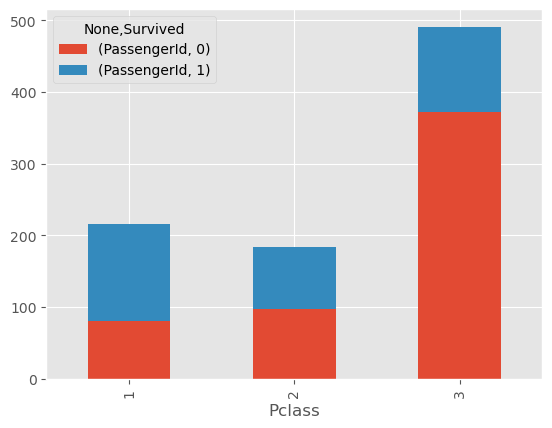

In [30]:
ticket_df.plot.bar(stacked=True)

In [31]:
ticket_df["survived_rate"] = ticket_df.iloc[:,1]/(ticket_df.iloc[:,0] + ticket_df.iloc[:,1])

In [32]:
ticket_df

PassengerId      survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363

### 年代ごとの生存率可視化

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


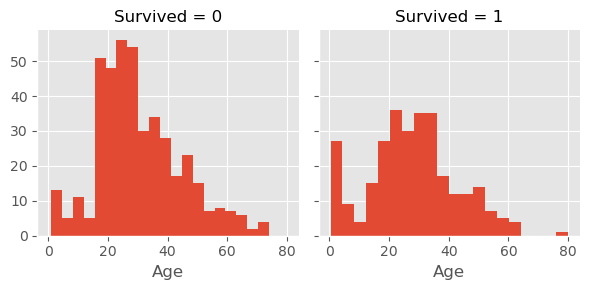

In [33]:
sns.FacetGrid(train_df, col='Survived').map(plt.hist,'Age', bins=20)

### カテゴリ変数をダミー変数化

In [34]:
train_df_corr = pd.get_dummies(train_df,columns=["Sex"],drop_first=True) #女性の値０　→男性なら１と分かるので、dropする
train_df_corr = pd.get_dummies(train_df_corr,columns=["Embarked"])       

In [35]:
train_df_corr.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN         1           0           0   
1          PC 17599  71.2833   C85         0           1           0   
2  STON/O2. 3101282   7.9250   NaN         0           0           0   
3            113803  53.1000  C123         0           0           0   
4            373450   8.0500   NaN         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

### 相関行列の作成

In [36]:
train_corr = train_df_corr.corr()

/tmp/ipykernel_57/2913344518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train_df_corr.corr()


In [37]:
train_corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_male        0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   
Embarked_C     -0.001205  0.168240 -0.243292  0.036261 -0.059528 -0.011069   
Embarked_Q     -0.033606  0.003650  0.221009 -0.022405 -0.026354 -0.081228   
Embarked_S      0.022148 -0.155660  0.081720 -0.032523  0.070941  0.063036   

                 Fare  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId  0.012658  0.042939   -0.001205   -0.033606    0.022148  
Survived     0.257307 -0.543351    0.168240    0.003650   -0.155660  
Pclass      -0.549500  0.131900   -0.243292    0.221009    0.081720  
Age          0.096067  0.093254    0.036261   -0.022405   -0.032523  
SibSp        0.159651 -0.114631   -0.059528   -0.026354    0.070941  
Parch        0.216225 -0.245489   -0.011069   -0.081228    0.063036  
Fare         1.000000 -0.182333    0.269335   -0.117216   -0.166603  
Sex_male    -0.182333  1.000000   -0.082853   -0.074115    0.125722  
Embarked_C   0.269335 -0.082853    1.000000   -0.148258   -0.778359  
Embarked_Q  -0.117216 -0.074115   -0.148258    1.000000   -0.496624  
Embarked_S  -0.166603  0.125722   -0.778359   -0.496624    1.000000

### ヒートマップでの可視化

<AxesSubplot: >

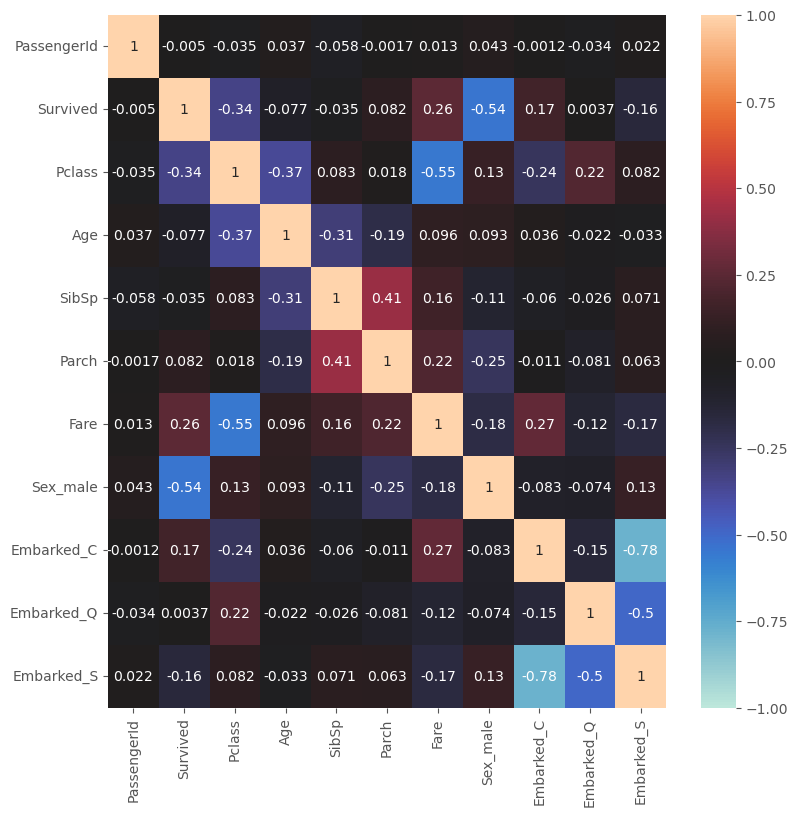

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1,center=0, annot=True)

survivedともっとも相関が高いのは、Sex_male(男性を１としているため、女性のほうが生き残る確率が高いということ)
\２番目は、Pclass(チケットの階級が高いほど生き残る確率が高い)

# 3.前処理、特徴量の生成

### 学習データとテストデータを結合する

In [39]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

In [40]:
all_df

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

欠損値の確認

In [41]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

欠損値補完（Fareにひとつあるため、平均値で埋める）

In [42]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

In [43]:
Fare_mean.columns =["Pclass","Fare_mean"]

In [44]:
Fare_mean

Pclass  Fare_mean
0       1  87.508992
1       2  21.179196
2       3  13.302889

In [45]:
all_df = pd.merge(all_df,Fare_mean,on = "Pclass",how = "left")
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean",axis=1)

### Nameの敬称に注目する

In [46]:
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

敬称を変数として追加する

In [47]:
name_df = all_df["Name"].str.split("[,.]",2,expand = True)

/tmp/ipykernel_57/2858198323.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  name_df = all_df["Name"].str.split("[,.]",2,expand = True)


In [48]:
name_df.columns = ["family_name","honorific","name"]

In [49]:
name_df

family_name honorific                                    name
0            Braund        Mr                             Owen Harris
1           Cumings       Mrs   John Bradley (Florence Briggs Thayer)
2         Heikkinen      Miss                                   Laina
3          Futrelle       Mrs           Jacques Heath (Lily May Peel)
4             Allen        Mr                           William Henry
...             ...       ...                                     ...
1304        Spector        Mr                                   Woolf
1305  Oliva y Ocana      Dona                                 Fermina
1306        Saether        Mr                         Simon Sivertsen
1307           Ware        Mr                               Frederick
1308          Peter    Master                               Michael J

[1309 rows x 3 columns]

空白文字の削除

In [50]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

人数のカウント

In [51]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

敬称ごとの年齢分布を確認する

In [52]:
all_df = pd.concat([all_df,name_df],axis=1)

In [53]:
all_df

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked    family_name  \
0         0           A/5 21171    7.2500   NaN        S         Braund   
1         0            PC 17599   71.2833   C85        C        Cumings   
2         0    STON/O2. 3101282    7.9250   NaN        S      Heikkinen   
3         0              113803   53.1000  C123        S       Futrelle   
4         0              373450    8.0500   NaN        S          Allen   
...     ...                 ...       ...   ...      ...            ...   
1304      0           A.5. 3236    8.0500   NaN        S        Spector   
1305      0            PC 17758  108.9000  C105        C  Oliva y Ocana   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S        Saether   
1307      0              359309    8.0500   NaN        S           Ware   
1308      1                2668   22.3583   NaN        C          Peter   

     honorific                                   name  
0           Mr                            Owen Harris  
1          Mrs  John Bradley (Florence Briggs Thayer)  
2         Miss                                  Laina  
3          Mrs          Jacques Heath (Lily May Peel)  
4           Mr                          William Henry  
...        ...                                    ...  
1304        Mr                                  Woolf  
1305      Dona                                Fermina  
1306        Mr                        Simon Sivertsen  
1307        Mr                              Frederick  
1308    Master                              Michael J  

[1309 rows x 15 columns]

<AxesSubplot: xlabel='honorific', ylabel='Age'>

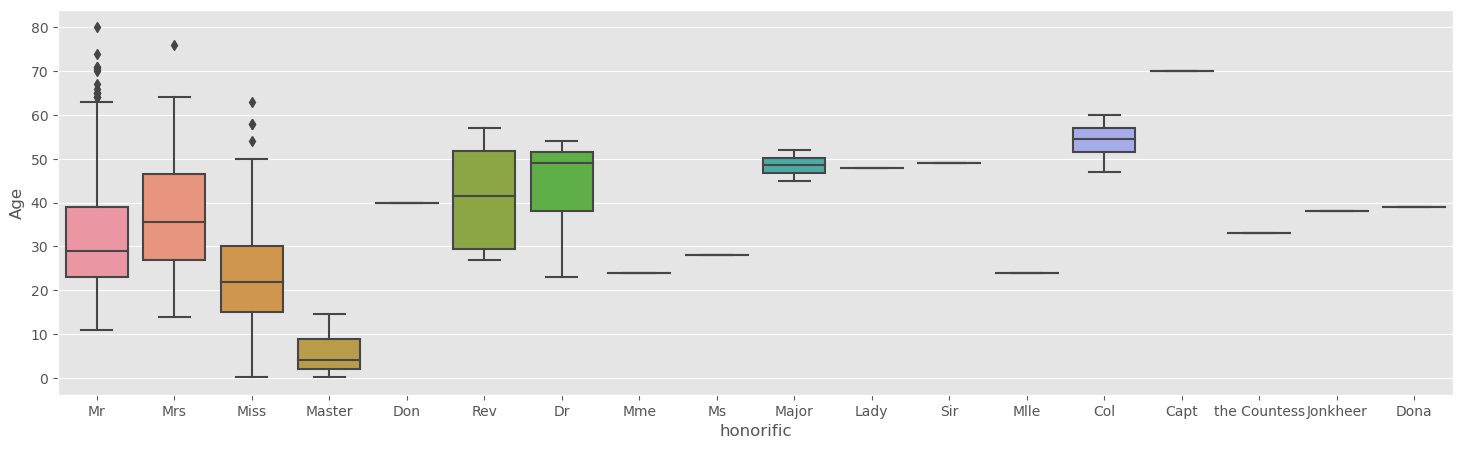

In [54]:
plt.figure(figsize=(18,5))
sns.boxplot(x="honorific", y="Age", data=all_df)

敬称ごとの年齢の平均値

In [55]:
all_df[["honorific","Age"]].groupby("honorific").mean()

Age
honorific              
Capt          70.000000
Col           54.000000
Don           40.000000
Dona          39.000000
Dr            43.571429
Jonkheer      38.000000
Lady          48.000000
Major         48.500000
Master         5.482642
Miss          21.774238
Mlle          24.000000
Mme           24.000000
Mr            32.252151
Mrs           36.994118
Ms            28.000000
Rev           41.250000
Sir           49.000000
the Countess  33.000000

敬称ごとの生存率の違い

In [56]:
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)],axis=1)

<AxesSubplot: xlabel='honorific'>

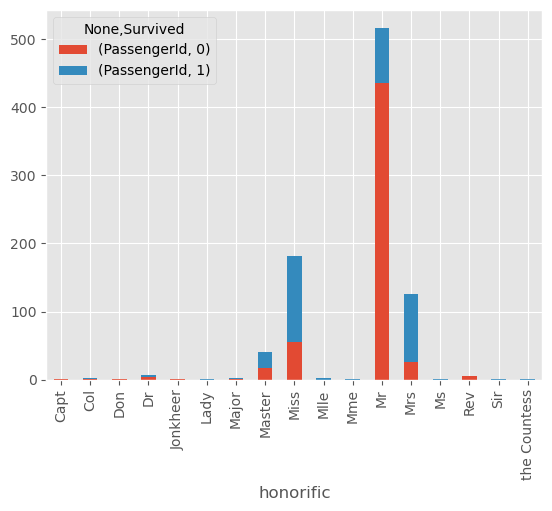

In [57]:
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

欠損値を平均値で補完

In [58]:
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()#honorificごとの平均値を算出
honorific_age_mean.columns = ["honorific","honorific_Age"]#カラム名をつける
all_df = pd.merge(all_df,honorific_age_mean,on="honorific",how="left")#全データにhonorificの平均値列を結合させる
all_df.loc[(all_df["Age"].isnull(),"Age")] = all_df["honorific_Age"]#欠損値のある行に平均値を入れる
all_df = all_df.drop(["honorific_Age"],axis=1)#平均値欄は削除

### 家族人数を追加する

In [59]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [60]:
all_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked family_name honorific  \
0      0         A/5 21171   7.2500   NaN        S      Braund        Mr   
1      0          PC 17599  71.2833   C85        C     Cumings       Mrs   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen      Miss   
3      0            113803  53.1000  C123        S    Futrelle       Mrs   
4      0            373450   8.0500   NaN        S       Allen        Mr   

                                    name  family_num  
0                            Owen Harris           1  
1  John Bradley (Florence Briggs Thayer)           1  
2                                  Laina           0  
3          Jacques Heath (Lily May Peel)           1  
4                          William Henry           0

In [61]:
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [62]:
#family_numが0なら、aloneに1を入れる
all_df.loc[all_df["family_num"] == 0, "alone"] =1
#欠損値を０で補完
all_df["alone"].fillna(0, inplace=True)

### 不要な変数を削除する

In [63]:
all_df = all_df.drop(["PassengerId","Name","family_name","Ticket","Cabin"],axis=1)
all_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked honorific  \
0       0.0       3    male  22.0      1      0   7.2500        S        Mr   
1       1.0       1  female  38.0      1      0  71.2833        C       Mrs   
2       1.0       3  female  26.0      0      0   7.9250        S      Miss   
3       1.0       1  female  35.0      1      0  53.1000        S       Mrs   
4       0.0       3    male  35.0      0      0   8.0500        S        Mr   

                                    name  family_num  alone  
0                            Owen Harris           1    0.0  
1  John Bradley (Florence Briggs Thayer)           1    0.0  
2                                  Laina           0    1.0  
3          Jacques Heath (Lily May Peel)           1    0.0  
4                          William Henry           0    1.0

### カテゴリ変数を数値に変換する

**カテゴリ変数を確認**

In [64]:
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['Sex', 'Embarked', 'honorific', 'name'], dtype='object')

### 敬称
Mr,Miss,Mrs,Master以外はotherとする

In [65]:
all_df.loc[~((all_df["honorific"] == "Mr") |\
    (all_df["honorific"] == "Miss") |\
    (all_df["honorific"] == "Mrs") |\
    (all_df["honorific"] == "Master")),"honorific"]= "other"

In [66]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

### Sex, Embarked, honorific をLabelEncordingする

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
all_df["Embarked"].fillna("missing",inplace=True)  # 欠損値を含む場合、missingで置き換え

In [69]:
all_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked honorific  \
0       0.0       3    male  22.0      1      0   7.2500        S        Mr   
1       1.0       1  female  38.0      1      0  71.2833        C       Mrs   
2       1.0       3  female  26.0      0      0   7.9250        S      Miss   
3       1.0       1  female  35.0      1      0  53.1000        S       Mrs   
4       0.0       3    male  35.0      0      0   8.0500        S        Mr   

                                    name  family_num  alone  
0                            Owen Harris           1    0.0  
1  John Bradley (Florence Briggs Thayer)           1    0.0  
2                                  Laina           0    1.0  
3          Jacques Heath (Lily May Peel)           1    0.0  
4                          William Henry           0    1.0

In [70]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific
name


In [71]:
all_df.dtypes

Survived      float64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
honorific       int64
name            int64
family_num      int64
alone         float64
dtype: object

In [71]:
all_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  honorific  \
0       0.0       3    1  22.0      1      0   7.2500         2          2   
1       1.0       1    0  38.0      1      0  71.2833         0          3   
2       1.0       3    0  26.0      0      0   7.9250         2          1   
3       1.0       1    0  35.0      1      0  53.1000         2          3   
4       0.0       3    1  35.0      0      0   8.0500         2          2   

   name  family_num  alone  
0   855           1    0.0  
1   601           1    0.0  
2   690           0    1.0  
3   541           1    0.0  
4  1102           0    1.0

すべてのデータを学習データとテストデータに戻す

In [72]:
# Syrvivedの値がnull（欠損）ではないものをtrain,そうでないものをtestとする

train_X = all_df[ ~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

# 4.モデリングを行う

### LightGBMのライブラリをインストールする

In [77]:
import lightgbm as lgb

In [78]:
!pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


ホールドアウト、クロスバリテーションを用いて検証データ、学習データを分割する

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

学習データの20%を検証データに分割する

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2,random_state = 123)

LightGBM用のデータセットを作成する

In [81]:
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]

*データセット作成*

In [82]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

ハイパーパラメータを設定する

In [83]:
lgbm_params = {
    "objective":"binary" , #二値分類
    "random_seed":1234
}

*機械学習モデルの学習*

In [84]:
model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                         valid_sets = lgb_eval,
                         num_boost_round=100,     #学習回数の指定（ベストスコアから何回か）
                         early_stopping_rounds=20,#何回で学習ストップするか
                         verbose_eval=10)         #学習結果の表示頻度

[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

各変数の重要度を調べる

In [85]:
model_lgb.feature_importance()

array([ 65,  29, 326,  17,  10, 323,  39,  17, 378,  34,   7], dtype=int32)

もとのデータのカラム名を表示

<AxesSubplot: >

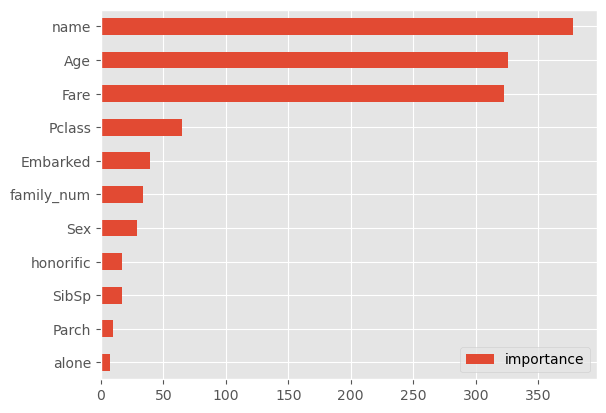

In [86]:
importance = pd.DataFrame(model_lgb.feature_importance(), index = X_train.columns, \
columns = ["importance"]).sort_values(by = "importance",ascending = True)
importance.plot.barh()

## 検証データで予測精度を確認

*モデルを検証データに適用する*

In [87]:
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

### accuracyを計算するライブラリをインポートする

In [88]:
from sklearn.metrics import accuracy_score

*精度の計算*

In [89]:
accuracy_score(y_valid, np.round(y_pred))  #この精度を基準として改善していく

0.8659217877094972

ハイパーパラメータを変更する

In [90]:
lgbm_params = {
    "objective":"binary" ,  # 二値分類
    "max_bin":331,  # 一つの分岐に入るデータ数の最大値
    "num_leaves":20,  # 一つの木に含まれる葉の最大数
    "min_data_in_leaf":57,  # 決定技中における一つの葉における最小のデータ数
    "random_seed":1234
}

*データセット作成*

In [91]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

*機械学習モデルの学習*

In [92]:
model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                         valid_sets = lgb_eval,
                         num_boost_round=100,     #学習回数の指定（ベストスコアから何回か）
                         early_stopping_rounds=20,#何回で学習ストップするか
                         verbose_eval=10)         #学習結果の表示頻度

[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

*モデルを検証データに適用する*

In [93]:
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

*精度の計算*

In [94]:
accuracy_score(y_valid, np.round(y_pred))

0.8715083798882681

## クロスバリテーションによる学習

３分割する

In [95]:
folds = 3

kf = KFold(n_splits=folds)